# Seaborn-多变量分析绘图

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

np.random.seed(sum(map(ord, "categorical")))
#这里导入三个数据集
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 对于类别来说，可以使用sns.stripplot()绘制类似散点图

In [15]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


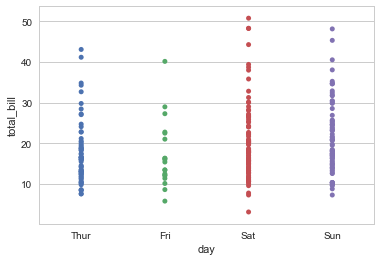

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips);

#### 重叠是很常见的现象，但是重叠影响我观察数据的量了

#### 加一个小的抖动就OK了

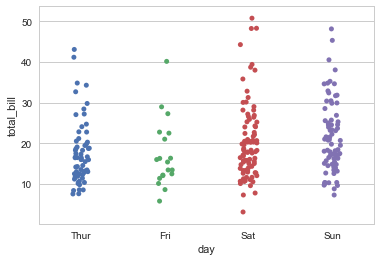

In [5]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

### 也有另外的解决方案
* sns.swarmplot()

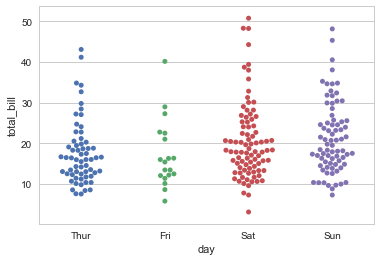

In [6]:
sns.swarmplot(x="day", y="total_bill", data=tips)

### 可以加一个hex指标，更佳便于区分数据

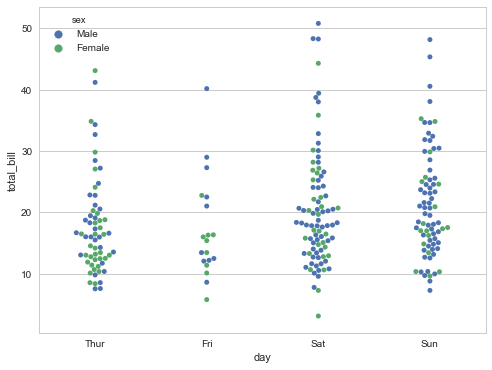

In [8]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="day", y="total_bill", hue="sex",data=tips)

### 横着画（调换x，y）

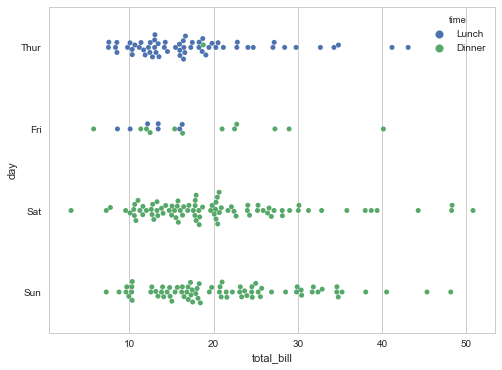

In [10]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

### 盒图  ###
>IQR即统计学概念四分位距，第一/四分位与第三/四分位之间的距离

>定义N = 1.5IQR 如果一个值大于Q3+N或小于Q1-N,则为离群点

#### 盒图中最上面和最下面的横杠为去除离群点后的最大值和最小值

#### 根据盒图可以看出数据的大致分布(也可以看出离群点在数据中所在的位置)

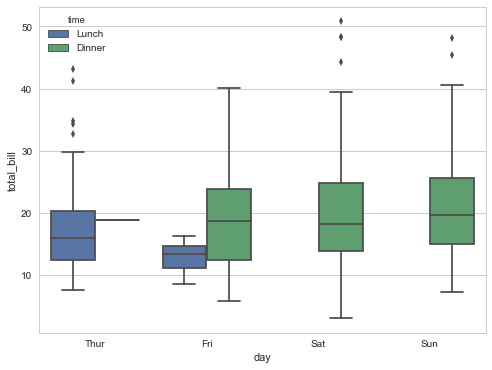

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

### 小提琴图

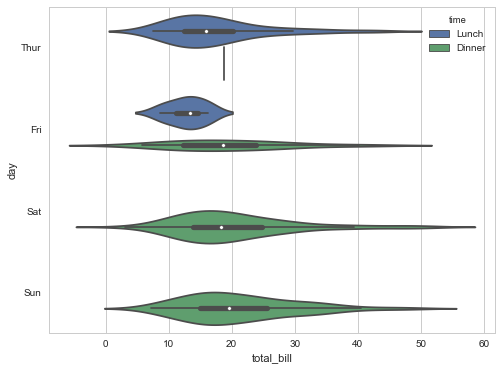

In [17]:
plt.figure(figsize=(8,6))
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

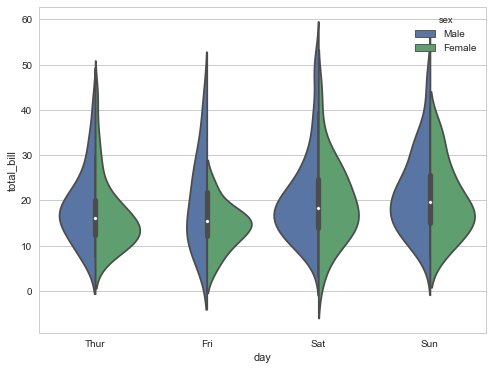

In [19]:
# 可指定split属性为True
plt.figure(figsize=(8,6))
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

### 可对图进行组合

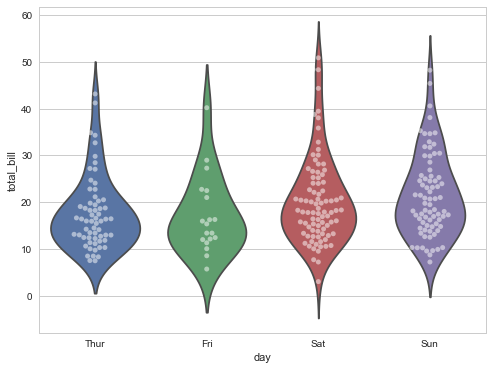

In [22]:
plt.figure(figsize=(8,6))
sns.violinplot(x="day", y="total_bill", data=tips,inner=None) #inner为None即去掉小提琴图中间的那部分类似盒图的地方
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5) 

### 显示值的集中趋势可以用条形图

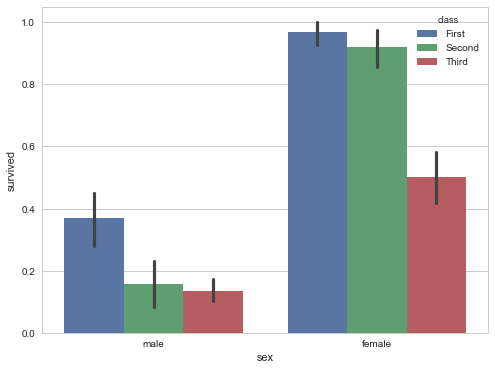

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

###   点图可以更好的描述变化差异 ###

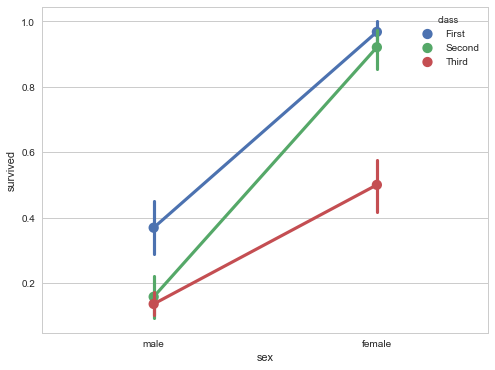

In [24]:
plt.figure(figsize=(8,6))
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

### 加一些细节

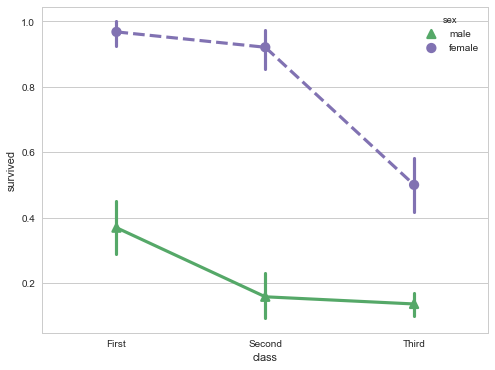

In [26]:
plt.figure(figsize=(8,6))
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 宽形数据 ###

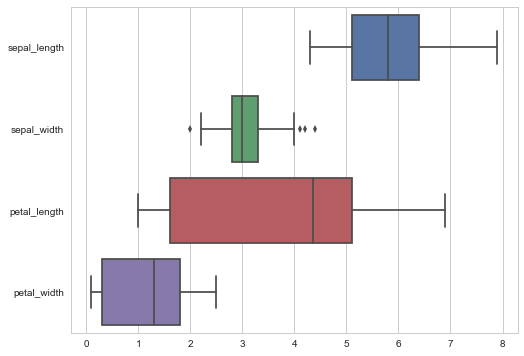

In [30]:
plt.figure(figsize=(8,6))
sns.boxplot(data=iris,orient="h");

###  多层面板分类图  ###
* sns.factorplot()

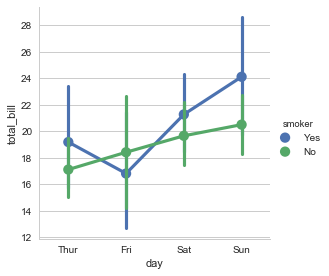

In [35]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)

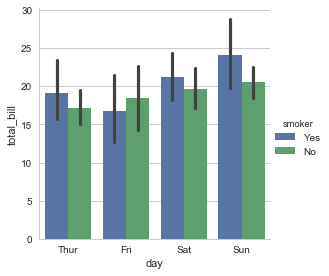

In [34]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")

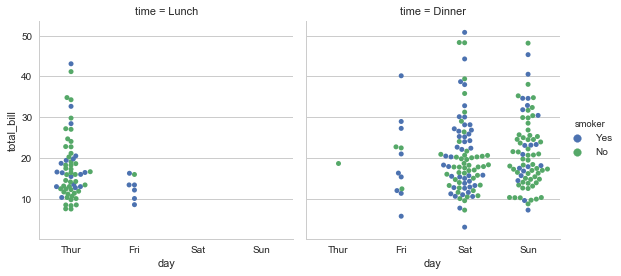

In [36]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm")

### aspect指定长宽比，size指定大小

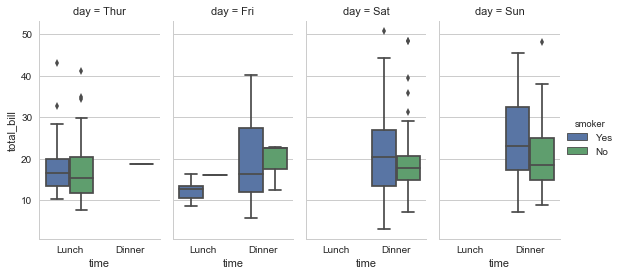

In [37]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5) 

* seaborn.factorplot()的参数

seaborn.factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)

### Parameters： ###

* x,y,hue 数据集变量 变量名
* date 数据集 数据集名
* row,col 更多分类变量进行平铺显示 变量名
* col_wrap 每行的最高平铺数 整数
* estimator 在每个分类中进行矢量到标量的映射 矢量
* ci 置信区间 浮点数或None
* n_boot 计算置信区间时使用的引导迭代次数 整数
* units 采样单元的标识符，用于执行多级引导和重复测量设计 数据变量或向量数据
* order, hue_order 对应排序列表 字符串列表
* row_order, col_order 对应排序列表 字符串列表
* kind : 可选：point 默认, bar 柱形图, count 频次, box 箱体, violin 提琴, strip 散点，swarm 分散点
size 每个面的高度（英寸） 标量
aspect 纵横比 标量
orient 方向 "v"/"h"
color 颜色 matplotlib颜色
palette 调色板 seaborn颜色色板或字典
legend hue的信息面板 True/False
legend_out 是否扩展图形，并将信息框绘制在中心右边 True/False
share{x,y} 共享轴线 True/False